In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
df = pd.read_csv('lingvforecast/data/dummy_data.csv', index_col=0)
df.head()

,A,B,C,D,E
0,0.128448,-0.007028,0.406063,0.224619,-0.112626
1,0.035867,-0.076149,0.115081,0.100729,0.346266
2,0.294256,0.163872,0.496499,0.536332,0.733913
3,0.223441,0.589740,0.268639,0.502248,0.575839
4,0.207133,0.655951,0.566752,0.779078,1.139448


In [35]:
from lingvforecast.ling_methods import ling_method

In [36]:
print(ling_method([0, 1, 4, 9], [9, 16, 25, 36, 49, 64, 81], horizon=3))

[13.0185124  18.21042825 24.09459955]


In [37]:
print(ling_method([1, 3, 5], [7, 9, 11, 13, 15, 17], horizon=3))

[ 7.  9. 11.]


# Test predict

In [1]:
from lingvforecast.models import LingvForecast
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('lingvforecast/data/dummy_data.csv', index_col=0)
df.head()

,A,B,C,D,E
0,0.128448,-0.007028,0.406063,0.224619,-0.112626
1,0.035867,-0.076149,0.115081,0.100729,0.346266
2,0.294256,0.163872,0.496499,0.536332,0.733913
3,0.223441,0.589740,0.268639,0.502248,0.575839
4,0.207133,0.655951,0.566752,0.779078,1.139448


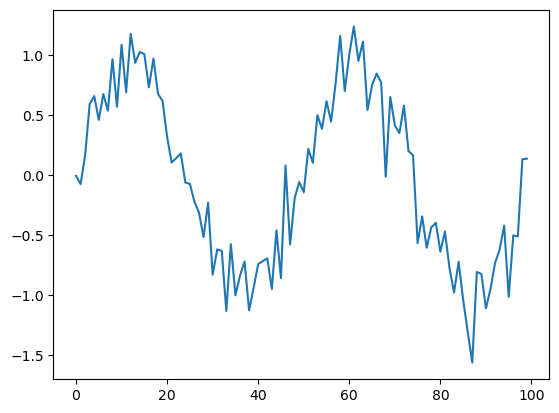

In [3]:
data = df['B']
plt.plot(data)

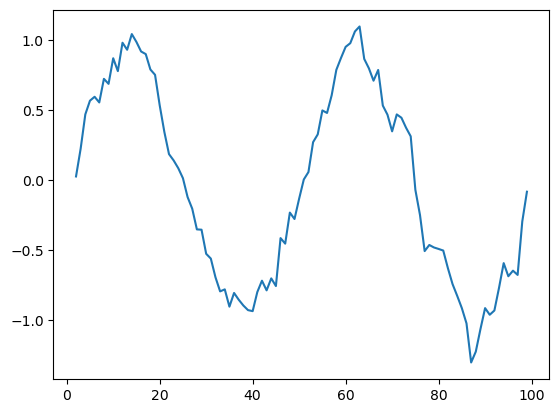

In [4]:
data = data.rolling(window=3).mean()
plt.plot(data)

In [5]:
# data split train and test
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)
print(len(train_data), len(test_data))

80 20


In [13]:
horizon = 8
model = LingvForecast()
# model.fit(np.array(train_data), np.array(df['A']), np.array(df['C']), np.array(df['D']), np.array(df['E']), corrcoef=0.8)
# model.fit(np.array(train_data), corrcoef=0.8)
model.fit(np.array(train_data), np.array(df['A'].rolling(window=3).mean()), np.array(df['C'].rolling(window=3).mean()), np.array(df['D'].rolling(window=3).mean()), np.array(df['E'].rolling(window=3).mean()), top=20, corrcoef=0.8)
res = model.predict(test_data[:-horizon], horizon=horizon)
print(res)

------ Max power = 18 -----
[-0.83821796 -0.71842733 -0.60187398 -0.472046   -0.39731332 -0.30438899
 -0.3109144  -0.30549021]


In [19]:
candidates = model.get_candidates()

In [18]:
from lingvforecast.ling_methods import row_corr
row = candidates[0]
[row_corr(row, r) for r in candidates[1:] if row_corr(row, r) >= 0.95]

[0.9799428200867046,
 0.9827022531696397,
 0.9762044359571979,
 0.9618540051012566,
 0.9520622479224842,
 0.9755147113737039,
 0.9530681043946518,
 0.952872222659986,
 0.9866355516253407,
 0.9619930619527101,
 0.9556706570899097,
 0.9679926716597672]

In [10]:
print(test_data[-horizon:])

92   -0.929903
93   -0.767521
94   -0.591725
95   -0.685371
96   -0.645537
97   -0.675844
98   -0.294524
99   -0.081985
Name: B, dtype: float64


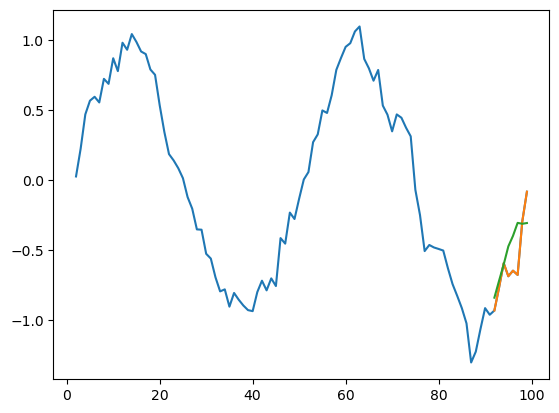

In [42]:
plt.plot(data)
plt.plot(test_data[-horizon:].index, test_data[-horizon:])
plt.plot(test_data[-horizon:].index, res)
plt.show()

# Test result forecast method

In [1]:
from lingvforecast.models import LingvForecast
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
import random
import matplotlib.pyplot as plt

def generate_curves(length, num_curves):
    curves = []
    for i in range(num_curves):
        curve = []
        for j in range(length):
            curve.append(random.uniform(-1, 1))
        curves.append(curve)
    return curves

def plot_curves(curves):
    for curve in curves:
        plt.plot(curve)
    plt.show()

# Пример использования
curves = generate_curves(5, 200)
# plot_curves(curves)

In [31]:
from lingvforecast.ling_methods import row_corr

In [32]:
[row_corr(curves[0], el) for el in curves[1:] if row_corr(curves[0], el) >= 0.85]

[0.8609506178602676,
 0.9757025210511293,
 0.9645250236503156,
 0.8774602885046161]

In [3]:
model = LingvForecast()
res = model._group_curves_by_correlation(curves)

In [5]:
[len(el) for el in res]

[1, 1, 1, 1, 1]